{0: 162, 1: 268}
Weight for class 0: 1.33
Weight for class 1: 0.80
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 147456)            0         
                                                       

<AxesSubplot:>

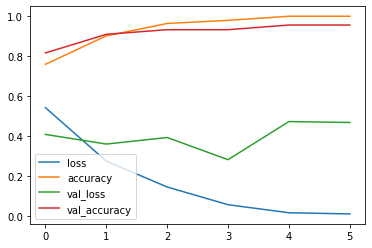

In [1]:
from tensorflow import keras
import pandas as pd
import numpy as np
import pickle

X_train = pickle.load(open('X_train_full.pickle', 'rb'))
y_train = pickle.load(open('y_train_full.pickle', 'rb'))
X_test = pickle.load(open('X_test.pickle', 'rb'))
y_test = pickle.load(open('y_test.pickle', 'rb'))

# Normalization
X_train = X_train/255.0     # max values of pixel is 255

# Change data type to np.array, validation_split only supports for np.array or Tensors
y_train = np.array(y_train)
y_test = np.array(y_test)

# data is imbalance, compute class weight for each class
values, counts = np.unique(y_train, return_counts=True)
values_counts = {values[0]: counts[0], values[1]: counts[1]}
print(values_counts)

# formula for class weights :  wj=n_samples / (n_classes * n_samplesj)
weight_for_0 = len(y_train) / (2 * counts[0])
weight_for_1 = len(y_train) / (2 * counts[1])

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))


model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=X_train.shape[1:]))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))

model.add(keras.layers.Dense(1, activation='sigmoid'))

print(model.summary())

model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True, mode='min')

history = model.fit(X_train, y_train, batch_size=8, epochs=15,
                    validation_split=0.1, callbacks=[early_stopping],
                    class_weight=class_weight)
            
pd.DataFrame(history.history).plot()

In [2]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 2s 529ms/step - loss: 3.3769 - accuracy: 0.9811


[3.3768672943115234, 0.9811320900917053]

In [11]:
model.save("brain_tumor_detection_CNN.h5")